In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

In [4]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                  random_state = 5)

In [5]:
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq =  pad_sequences(x_val, maxlen = 100)
test_seq = pad_sequences(x_test, maxlen = 100)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_length = 100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64,5, activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55))
model.add(keras.layers.Dense(1, activation ="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [8]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/cnnrnn-model.h5",
                                               save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [9]:
history = model.fit(train_seq, y_train, epochs = 50, batch_size = 128,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
157/157 [==============================] - 33s 184ms/step - loss: 0.4955 - accuracy: 0.7423 - val_loss: 0.3513 - val_accuracy: 0.8496
Epoch 2/50


C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 26s 169ms/step - loss: 0.3057 - accuracy: 0.8714 - val_loss: 0.3166 - val_accuracy: 0.8626
Epoch 3/50
157/157 [==============================] - 29s 186ms/step - loss: 0.2561 - accuracy: 0.8968 - val_loss: 0.3238 - val_accuracy: 0.8646
Epoch 4/50
157/157 [==============================] - 29s 184ms/step - loss: 0.2238 - accuracy: 0.9125 - val_loss: 0.3360 - val_accuracy: 0.8610
Epoch 5/50
157/157 [==============================] - 30s 192ms/step - loss: 0.1897 - accuracy: 0.9283 - val_loss: 0.3340 - val_accuracy: 0.8624


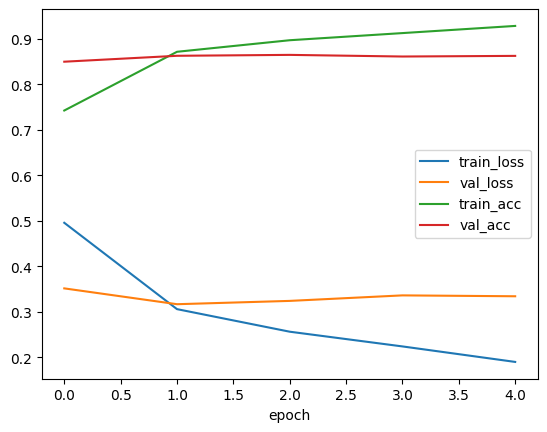

In [10]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()